In [1]:
%%capture
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#%pip install xgboost

In [3]:
# Data manipulation
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.express as px


# Modelling
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

from sklearn.linear_model import LogisticRegression
from pandas.plotting import scatter_matrix
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report

# Write models to file
import joblib

# Set parameters
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
rcParams['font.size'] = 12
rcParams['axes.facecolor'] = 'white'
plots_rgb_blue = 'rgb(31,119,180)'

%matplotlib inline

# Auckland Traffic Crash Model

### Introduction
The purpose of this project is create a model that can predict vehicle crashes in Auckland City.

### Datasets
- Crash Analysis System (CAS) - Waka Kotahi
- State Highway Traffic Volumes - Waka Kotahi
- Population counts - United Nations - World Population Prospects
- Open-Meteo Weather API 

### Model
Developing a predictive model for vehicle crashes in Auckland has a number of use cases. It is information that can be used to either plan resource allocation, such as police traffic monitoring or emergency/hospital service rosters or target certain areas with preventative measures such as speed camera monitoring. There are well known high risk periods such as higher traffic volumes on public holidays periods. 

### Data Preparation
The data approach combined used the mesh block id of each crash, which enabled the extraction of crashed by statistical area 2 and 3 to be obtained. Using the financial year that crashes occurred and then splitting the data into half yearly groups with corresponding traffic count, population counts. Files for SA2 and SA3 were created and these were used for developing models.

Descriptions for Meshblock, statistical areas 2 & 3 can be found on the statistics New Zealand website. Meshblock is the smallest geographical unit statistics New Zealand uses and ideally consists of 30–60 dwellings (containing approximately 60–120 residents). These can subsequently be mapped to higher geographical units, statistical areas 2 & 3  [Auckland SA2 and SA3 boundaries](https://statsnz.maps.arcgis.com/apps/webappviewer/index.html?id=6f49867abe464f86ac7526552fe19787)

Roungly 30% of the SA2 files could not be mapped to meshblocks directly. A k-NN model was used to predict which meshblocks they mapped to SA2 blocks.

Specific date information is not included in the public CAS data, this is likely to protect privacy of individuals involved in crashes where it would be relatively easy to deduce details of a specific crash.

Feature engineering was performed on the weather data to create a day and night variable, based on light conditions. Nulls values for weather were proportionally allocated to the other categories, excluding the categories "hail and sleet" and "snow" which had very few records.

### Modelling
Each row for SA2 and SA3 has a total crashes amount. In both groups the counts were relatively small for each row of data, with the mean for SA2 being 2.7 and SA3 being 5.2 and both had a tail of outliers which ranged up to 67 and 163 respectively.

#### Regression Modelling
A small number of regression models were run using the SA2 file and the result for the best model was as follows.

Random Forest Performance:<br>
Mean Absolute Error: 1.02<br>
Mean Squared Error: 3.31<br>
R^2 Score: 0.68<br>

The R^2 value has a moderate predictive value. 

#### Classification Modelling
Given that outcome of the model is to predict hotspots, and the data has very low crash numbers for each geographical area, a classification approach for modelling was found to be more useful.

A crash category label was created for the SA2 and SA3 files by splitting the data into a high (1) and low crash (0) group with roughly 20% of the data in the high crash group. The aim is to predict the high-crash numbers label and these would represent the crash hot-spots.

##### SA3 File
<p>10157 entries</p>
<p>Split at mean 5.2</p>
<p>crashCategory</p>
<pre>
0    7843
1    2314
Name: count, dtype: int64
</pre>

##### SA2 File
<p>19309 entries</p>
<p>Split at 3.4</p>
<pre>
0    15104
1     4205
Name: count, dtype: int64
</pre>

The models tested were: <br>
 - Logistic Regression
 - K-NN
 - Random Forest
 - SGD Classifier
 - SVXGBoost
 -  Naïve-Bayes
 - Hist Gradient Boosting

Overall, the SA3 data produced the best models overall. For both files, the best performing model was the logistic regression one.

<h3>SA3 File</h3>

<p><strong>AUC</strong>: 0.97<br>
<strong>Logistic Regression Accuracy</strong>: 0.92</p>

<p><strong>Classification Report</strong>:</p>
<pre>
              precision    recall  f1-score   support

           0         0.94      0.97      0.95      1562
           1         0.88      0.78      0.82       470

    accuracy                             0.92      2032
   macro avg          0.91      0.87      0.89      2032
weighted avg       0.92      0.92      0.92      2032
</pre>

<h3>SA2 File</h3>

<p><strong>AUC</strong>: 0.92<br>
<strong>Logistic Regression Accuracy</strong>: 0.88</p>

<p><strong>Classification Report</strong>:</p>
<pre>
              precision    recall  f1-score   support

           0         0.90      0.95      0.92      3043
           1         0.76      0.63      0.69       819

    accuracy                             0.88      3862
   macro avg          0.83      0.79      0.80      3862
weighted avg       0.87      0.88      0.87      3862
</pre>

Both models have good overall accuracy scores and the predict the low crash (class  0) well with high precision and recall. They are both less accurate with the high crash (class 1). This is likely to be caused because the class sizes are have some class imbalance. Both had high AUCs.

### Key findings:

1.	Classification approach yielded the best models at the SA3 level, with the logistic regression model production.  
2.	SA2 models were lower quality by provide more practical applications, particularly for short term actions such as traffic safety monitoring.
3.	Both show differences when the weather forecast variable was used to predict hotspots (high crash numbers). 
4.	There was no high crash data for the King’s birthday holiday however and could be caused because the crashes are grouped into 6 monthly periods. Experience of holiday weekends is that they are high risk periods for severe crashes. 
5.	Similarly there was not real observable difference for day or night when the model was visualised.
6.	Training data over a longer time period, with a specific crash date and traffic volumes from suburban areas of the crashes would likely enhance the models.
7.	Actions that taken from a model like this broadly fit into short and long term actions. Emergency services rosters and traffic monitoring measures could be planned around public holidays and weather forecasts and potentially seasons, Christmas holidays periods and poorer winter weather requiring more resources. Because of this we choose to plot the SA2 model in the online map. The reason for this is that the SA2 geographically smaller and provides more specific information about where crash hotspots are occurring. An example is the road to Piha, in SA2 the area it is more identifiable, with SA3 all of the Waitakere ranges are included. SA3 models could be better suited for longer term planning, examples are planning the locations of new bases for emergency services or major weather events.

### Visualisation Output:
Plotting the mesh blocks onto a map was relatively easy and these were able to be coloured to show SA2 groups. [SA2 to meshblock map](https://aucklandcrashmodel.streamlit.app/) It is however, quite difficult for users to see the hotspot areas as a whole due to all the extra meshblock boundaries.

The other approach for plotting SA2 groups, the statistics New Zealand file had a lot more data issues with the polygon data and some SA2 areas are missing in the overall map. It would take a significant amount of time to resolve. The other challenge to resolve is that 14 days of weather data and each SA2 results in approximately 100,000 records and the polygon column contains a lot more points and this results in a file size problem for Streamlit.

[Auckland Accident Hotspot Model](https://auckland.streamlit.app/#auckland-city-crash-map)


### Code Map

![Code Map](Codemap.png)


# Data Wrangling 

In [4]:
# Code for merging dataframes "prepare cas dataset for modelling"
# CAS Merged Data

file_path1 = 'cas_SA2_level.csv'
cas_SA2 = pd.read_csv(file_path1)

file_path2 = 'cas_SA3_level.csv'
cas_SA3 = pd.read_csv(file_path2)

# EDA/Data Visualisation
## SA3 File

In [5]:
cas_SA3.columns

Index(['halfYear', 'isHoliday', 'partOfDay', 'weatherA', 'weatherB',
       'SA3_Name', 'trafficCount', 'population', 'crashesCount'],
      dtype='object')

In [6]:
cas_SA3.describe()

,isHoliday,trafficCount,population,crashesCount
count,10157.000000,1.015700e+04,1.015700e+04,10157.000000
mean,0.166782,4.945389e+06,1.591294e+06,5.226346
std,0.372799,4.526493e+05,3.617468e+04,9.683646
min,0.000000,3.964167e+06,1.533750e+06,1.000000
25%,0.000000,4.967806e+06,1.563250e+06,1.000000
50%,0.000000,5.041846e+06,1.588250e+06,2.000000
75%,0.000000,5.203575e+06,1.624250e+06,5.000000
max,1.000000,5.478786e+06,1.646500e+06,163.000000


In [7]:
# Plotting the boxplot using Plotly
fig = px.box(y=cas_SA3['crashesCount'], title="Crashes Count", color_discrete_sequence=['#21918c'])

# Update layout
fig.update_layout(
    width=600,  
    height=500,  
    xaxis_title="Count",
    yaxis_title="Crashes Count",
    showlegend=False
)

fig.show()

In [8]:
holiday_counts = cas_SA3.groupby(['isHoliday']).count()
holiday_counts['crashesCount']

isHoliday
0    8463
1    1694
Name: crashesCount, dtype: int64

In [9]:
# Light Conditions were mapped 
partOfDay_counts = cas_SA3.groupby(['partOfDay']).count()
partOfDay_counts['crashesCount']

partOfDay
Day      5369
Night    4788
Name: crashesCount, dtype: int64

In [10]:
weatherA_counts = cas_SA3.groupby(['weatherA']).count()
weatherA_counts['crashesCount']

weatherA
Fine             5397
Hail or Sleet       4
Heavy rain       1254
Light rain       3106
Mist or Fog       395
Snow                1
Name: crashesCount, dtype: int64

In [11]:
weatherB_counts = cas_SA3.groupby(['weatherB']).count()
weatherB_counts['crashesCount']

weatherB
Frost           314
Null           8818
Strong wind    1025
Name: crashesCount, dtype: int64

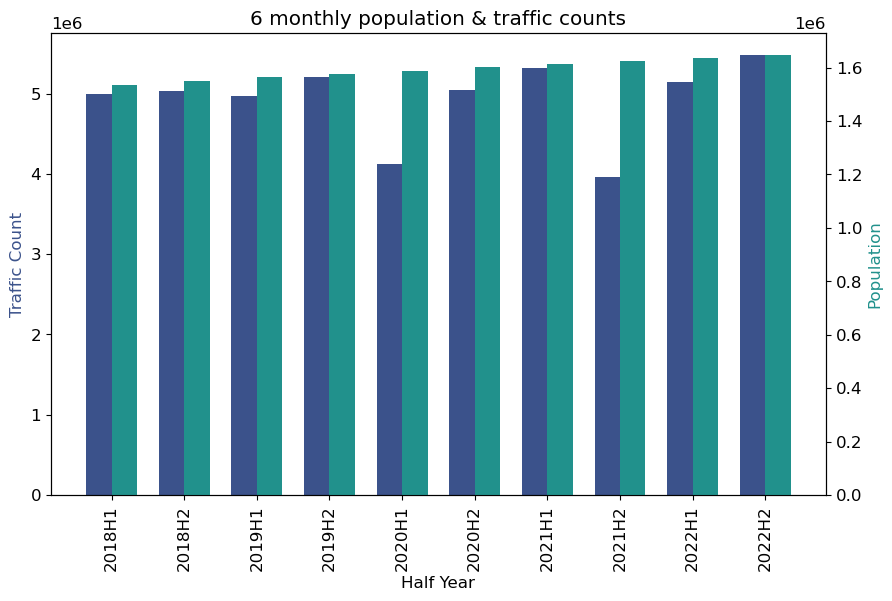

In [12]:

# Create 1 row per half year, dataset was prepared with repeating data.
pop_crash_data = cas_SA3.drop(['isHoliday', 'partOfDay', 'weatherA', 'weatherB', 'SA3_Name', 'crashesCount'], axis=1)
pop_crash_data = cas_SA3.drop_duplicates(subset=['halfYear'])


fig, ax1 = plt.subplots()

bar_width = 0.35
index = range(len(pop_crash_data['halfYear']))

bar1 = ax1.bar(index, pop_crash_data['trafficCount'], bar_width, label='Traffic Count', color='#3b528b')
ax2 = ax1.twinx()
bar2 = ax2.bar([i + bar_width for i in index], pop_crash_data['population'], bar_width, label='Population', color='#21918c')

ax1.set_xlabel('Half Year')
ax1.set_ylabel('Traffic Count', color='#3b528b')
ax2.set_ylabel('Population', color='#21918c')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(pop_crash_data['halfYear'], rotation=90)
plt.title('6 monthly population & traffic counts')

plt.show()

## SA2 File

In [13]:
cas_SA2.columns

Index(['halfYear', 'isHoliday', 'partOfDay', 'weatherA', 'weatherB',
       'SA2_Name', 'SA3_Name', 'trafficCount', 'population', 'crashesCount'],
      dtype='object')

In [14]:
cas_SA2.describe()

,isHoliday,trafficCount,population,crashesCount
count,19309.000000,1.930900e+04,1.930900e+04,19309.000000
mean,0.114662,4.946186e+06,1.591002e+06,2.749184
std,0.318621,4.507700e+05,3.609245e+04,3.455916
min,0.000000,3.964167e+06,1.533750e+06,1.000000
25%,0.000000,4.967806e+06,1.563250e+06,1.000000
50%,0.000000,5.041846e+06,1.588250e+06,1.000000
75%,0.000000,5.203575e+06,1.624250e+06,3.000000
max,1.000000,5.478786e+06,1.646500e+06,67.000000


In [15]:
# Plotting the boxplot using Plotly
fig = px.box(y=cas_SA2['crashesCount'], title="Crashes Count", color_discrete_sequence=['#21918c'])

fig.update_layout(
# Update layout
    width=600,  
    height=500,  
    xaxis_title="Count",
    yaxis_title="Crashes Count",
    showlegend=False
)

# Show the plot
fig.show()

Given that mean is 2.7 and std 3.4, most of the crash numbers are relatively low for each area and regression models are unlikely to be able to produce a model with such low numbers. Creating categories will enable the problem to be modelled using classification.

In [16]:
holiday_counts = cas_SA2.groupby(['isHoliday']).count()
holiday_counts['crashesCount']

isHoliday
0    17095
1     2214
Name: crashesCount, dtype: int64

In [17]:
# Light Conditions were mapped 
partOfDay_counts = cas_SA2.groupby(['partOfDay']).count()
partOfDay_counts['crashesCount']

partOfDay
Day      10347
Night     8962
Name: crashesCount, dtype: int64

In [18]:
weatherA_counts = cas_SA2.groupby(['weatherA']).count()
weatherA_counts['crashesCount']

weatherA
Fine             12111
Hail or Sleet        4
Heavy rain        1510
Light rain        5255
Mist or Fog        428
Snow                 1
Name: crashesCount, dtype: int64

In [19]:
weatherB_counts = cas_SA2.groupby(['weatherB']).count()
weatherB_counts['crashesCount']

weatherB
Frost            331
Null           17859
Strong wind     1119
Name: crashesCount, dtype: int64

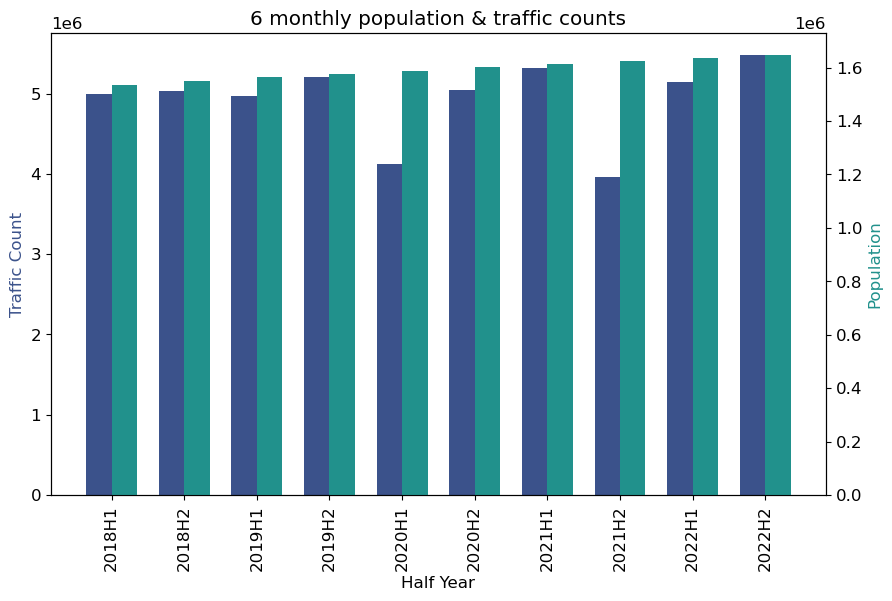

In [20]:
# Create 1 row per half year, dataset was prepared with repeating data.
pop_crash_data = cas_SA2.drop(['isHoliday', 'partOfDay', 'weatherA', 'weatherB',
       'SA2_Name', 'SA3_Name', 'crashesCount'], axis=1)
pop_crash_data = cas_SA2.drop_duplicates(subset=['halfYear'])

fig, ax1 = plt.subplots()

bar_width = 0.35
index = range(len(pop_crash_data['halfYear']))

bar1 = ax1.bar(index, pop_crash_data['trafficCount'], bar_width, label='Traffic Count', color='#3b528b')
ax2 = ax1.twinx()
bar2 = ax2.bar([i + bar_width for i in index], pop_crash_data['population'], bar_width, label='Population', color='#21918c')

ax1.set_xlabel('Half Year')
ax1.set_ylabel('Traffic Count', color='#3b528b')
ax2.set_ylabel('Population', color='#21918c')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(pop_crash_data['halfYear'], rotation=90)
plt.title('6 monthly population & traffic counts')

plt.show()

In [21]:
pop_crash_data

,halfYear,isHoliday,partOfDay,weatherA,weatherB,SA2_Name,SA3_Name,trafficCount,population,crashesCount
0,2018H1,0,Day,Fine,Frost,Armoy,East Tamaki,4.994207e+06,1533750.0,1
2284,2018H2,0,Day,Fine,Frost,Avondale Central (Auckland),Avondale (Auckland),5.037423e+06,1549250.0,1
4266,2019H1,0,Day,Fine,Frost,Clover Park East,Clover Park,4.967806e+06,1563250.0,1
6150,2019H2,0,Day,Fine,Frost,Botany Junction,East Tamaki,5.203575e+06,1575750.0,1
8274,2020H1,0,Day,Fine,Frost,Bucklands Beach Central,Bucklands Beach,4.123442e+06,1588250.0,1
9963,2020H2,0,Day,Fine,Frost,Botany Junction,East Tamaki,5.041846e+06,1600750.0,1
11874,2021H1,0,Day,Fine,Frost,East Tamaki,East Tamaki,5.321994e+06,1612750.0,1
13911,2021H2,0,Day,Fine,Frost,Birdwood West,Waitakere West,3.964167e+06,1624250.0,1
15702,2022H1,0,Day,Fine,Frost,Conifer Grove East,Conifer Grove,5.146414e+06,1635500.0,1
17504,2022H2,0,Day,Fine,Frost,Cheltenham,Devonport,5.478786e+06,1646500.0,1


In [22]:
pop_crash_data['ratio'] = (pop_crash_data['population'])/(pop_crash_data['trafficCount'])
pop_crash_data

/var/folders/fv/pf3gh0017sg75klx31yfb1100000gn/T/ipykernel_11044/3076857187.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,halfYear,isHoliday,partOfDay,weatherA,weatherB,SA2_Name,SA3_Name,trafficCount,population,crashesCount,ratio
0,2018H1,0,Day,Fine,Frost,Armoy,East Tamaki,4.994207e+06,1533750.0,1,0.307106
2284,2018H2,0,Day,Fine,Frost,Avondale Central (Auckland),Avondale (Auckland),5.037423e+06,1549250.0,1,0.307548
4266,2019H1,0,Day,Fine,Frost,Clover Park East,Clover Park,4.967806e+06,1563250.0,1,0.314676
6150,2019H2,0,Day,Fine,Frost,Botany Junction,East Tamaki,5.203575e+06,1575750.0,1,0.302821
8274,2020H1,0,Day,Fine,Frost,Bucklands Beach Central,Bucklands Beach,4.123442e+06,1588250.0,1,0.385176
9963,2020H2,0,Day,Fine,Frost,Botany Junction,East Tamaki,5.041846e+06,1600750.0,1,0.317493
11874,2021H1,0,Day,Fine,Frost,East Tamaki,East Tamaki,5.321994e+06,1612750.0,1,0.303035
13911,2021H2,0,Day,Fine,Frost,Birdwood West,Waitakere West,3.964167e+06,1624250.0,1,0.409733
15702,2022H1,0,Day,Fine,Frost,Conifer Grove East,Conifer Grove,5.146414e+06,1635500.0,1,0.317794
17504,2022H2,0,Day,Fine,Frost,Cheltenham,Devonport,5.478786e+06,1646500.0,1,0.300523


The ratio of traffic counts to population ranges from 0.3 to 0.4 from 2018 to 2022 in the Auckland region. These 3 variables might not contribute much to the model as a group. So I'll try adding/removing them and seeing the results.

# Model 

Test our various models and do further training and tuning on the best one.

In [23]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define the preprocessing function
def pp(features, num_attribs, cat_attribs, fit=False, preprocessor_pipeline=None):
    # Ensure numeric columns are in the correct data type
    features[num_attribs] = features[num_attribs].apply(pd.to_numeric, errors='coerce')

    # Ensure categorical columns are in the correct data type
    features[cat_attribs] = features[cat_attribs].astype(str)
    
    if fit:
        # Define the numeric pipeline
        num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill all nulls with the most frequent value
            ('scaler', StandardScaler())
        ])

        # Define the categorical pipeline
        cat_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill nulls with the most frequent value
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical variables
        ])

        # Combine the numeric and categorical pipelines into a preprocessor
        preprocessor_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attribs),
            ("cat", cat_pipeline, cat_attribs),
        ])

        # Fit and transform the features
        return preprocessor_pipeline, preprocessor_pipeline.fit_transform(features)
    else:
        # Just transform the features using the provided preprocessor_pipeline
        return preprocessor_pipeline, preprocessor_pipeline.transform(features)


In [24]:
# Function to calculate and plot ROC AUC
def plot_roc_auc(y_test, y_pred_prob, name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.grid(True)
    plt.legend(loc='best') 

# Classifiers with SA3

In [25]:
# Prepare data for modelling
data = cas_SA3

# Adding the crash category, splitting the data by the ,  (0 <= to 5.2, 1 is above 5.2)
data['crashCategory'] = np.where(data['crashesCount'] <= 5.2, 0, 1)

# Adding the population to traffic volume ratio
data['ratio'] = data['population']/data['trafficCount']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10157 entries, 0 to 10156
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   halfYear       10157 non-null  object 
 1   isHoliday      10157 non-null  int64  
 2   partOfDay      10157 non-null  object 
 3   weatherA       10157 non-null  object 
 4   weatherB       10157 non-null  object 
 5   SA3_Name       10157 non-null  object 
 6   trafficCount   10157 non-null  float64
 7   population     10157 non-null  float64
 8   crashesCount   10157 non-null  int64  
 9   crashCategory  10157 non-null  int64  
 10  ratio          10157 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 873.0+ KB


In [26]:
# Note that taking crashes up to the Mean 5.2. 
data['crashCategory'].value_counts()

crashCategory
0    7843
1    2314
Name: count, dtype: int64

In [27]:
# TRAIN, VALIDATION AND TEST SETS

# - X_train: Training features
# - X_test: Testing features
# - y_train: Training target
# - y_test: Training Target

# Drop columns not to be used as features
X = data.drop(["halfYear","crashesCount", "crashCategory","ratio"], axis=1)
y = data["crashCategory"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
# Split the training data into train and validation

In [28]:
X.head(1)

,isHoliday,partOfDay,weatherA,weatherB,SA3_Name,trafficCount,population
0,0,Day,Fine,Frost,Avondale (Auckland),4.994207e+06,1533750.0


In [29]:
num_attribs = ["isHoliday","trafficCount","population"]
cat_attribs = ["partOfDay","weatherA","weatherB","SA3_Name"]

In [30]:
# Fit and transform the train set
preprocessor_pipeline, X_train_processed = pp(X_train, num_attribs, cat_attribs, fit=True)

# Transform the test set using the fitted pipeline
_, X_test_processed = pp(X_test, num_attribs, cat_attribs, preprocessor_pipeline=preprocessor_pipeline)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)


Processed X_train shape: (8125, 205)
Processed X_test shape: (2032, 205)


Logistic Regression Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1562
           1       0.88      0.78      0.82       470

    accuracy                           0.92      2032
   macro avg       0.91      0.87      0.89      2032
weighted avg       0.92      0.92      0.92      2032

k-NN Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1562
           1       0.77      0.71      0.74       470

    accuracy                           0.88      2032
   macro avg       0.84      0.82      0.83      2032
weighted avg       0.88      0.88      0.88      2032

Random Forest Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1562
           1       0.87      0.76      0.81       470

    accuracy                 

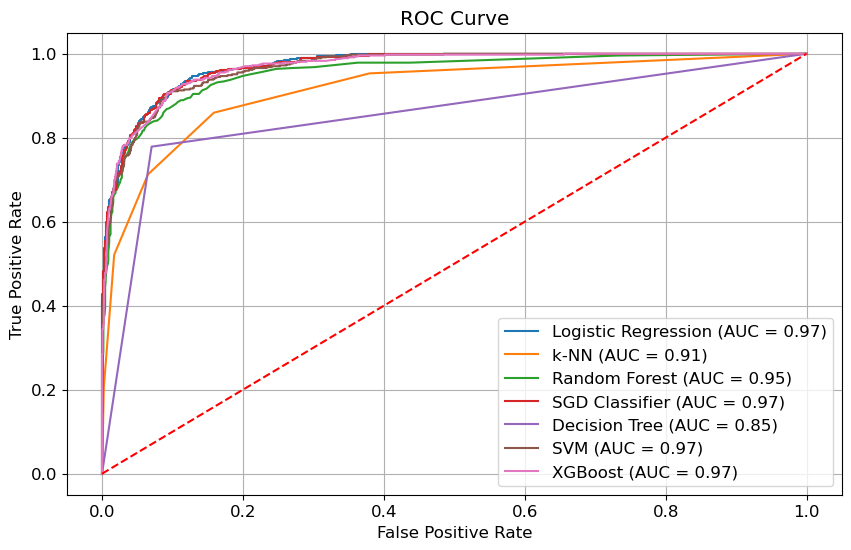

<Figure size 800x500 with 0 Axes>

In [31]:
# Allow 30 seconds to run
# List of classifiers to use
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SGD Classifier": SGDClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train_processed, y_train)
    y_pred = clf.predict(X_test_processed)
    y_pred_prob = clf.predict_proba(X_test_processed)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    plot_roc_auc(y_test, y_pred_prob, name)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))


# Train and evaluate each classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.figure(figsize=(8, 5))
plt.show()

## Tuning
Decision Tree SA3 is the worst model and most likely to benefit from tuning.
The result gives accuracy and precision scores all improved. 

Accuracy went from 0.85 to 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1562
           1       0.83      0.79      0.81       470

    accuracy                           0.91      2032
   macro avg       0.88      0.87      0.88      2032
weighted avg       0.91      0.91      0.91      2032

Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Test set accuracy: 0.91


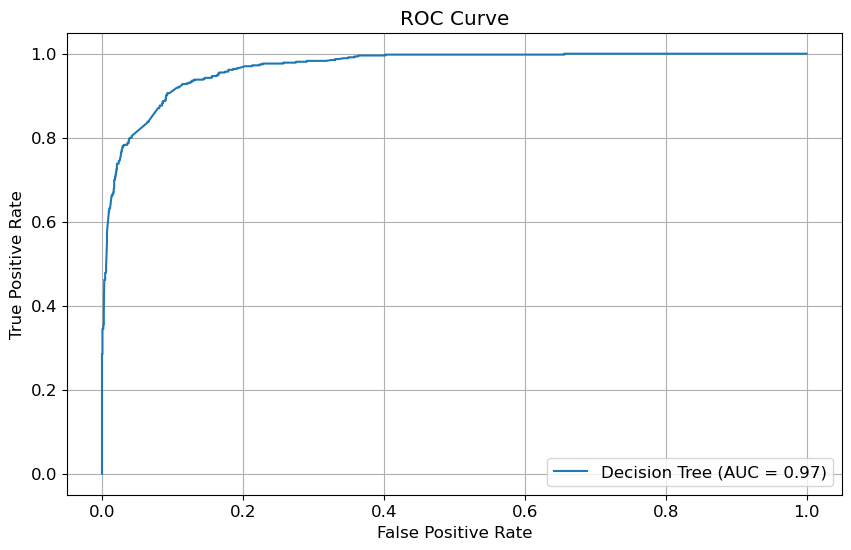

In [32]:

# Step 1: Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Step 2: Initialize the classifier
dt = DecisionTreeClassifier()

# Step 3: Perform grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_processed, y_train)

# Step 4: Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_processed)
accuracy = accuracy_score(y_test, y_pred)
plot_roc_auc(y_test, y_pred_prob, "Decision Tree")
print('Classification Report:')
print(classification_report(y_test, y_pred))
print("Best parameters found: ", grid_search.best_params_)
print("Test set accuracy: {:.2f}".format(accuracy))

## SA3 Naive Bayes

Naive Bayes Accuracy: 0.51
Naive Bayes ROC AUC: 0.68


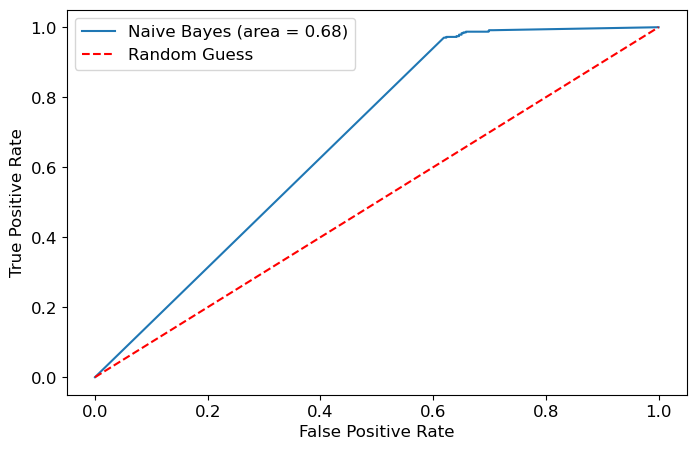

In [33]:
# Convert sparse matrices to dense matrices
X_train_dense = X_train_processed.toarray()
X_test_dense = X_test_processed.toarray()

# Initialize the Naive Bayes classifier
NB = GaussianNB()

# Train the classifier
NB.fit(X_train_dense, y_train)

# Make predictions
y_pred = NB.predict(X_test_dense)
y_pred_prob = NB.predict_proba(X_test_dense)[:, 1]

# Calculate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Naive Bayes Accuracy: {accuracy:.2f}')
print(f'Naive Bayes ROC AUC: {roc_auc:.2f}')

# Plotting the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Naive Bayes (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



## SA3 HistGradientBoostingClassifier

In [34]:
encoder = OrdinalEncoder()
X[cat_attribs] = encoder.fit_transform(X[cat_attribs])
X_out = X[cat_attribs + num_attribs]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_out, y, test_size=0.2, random_state=15)

categorical_features = [X_out.columns.get_loc(col) for col in cat_attribs]
numerical_features = [col for col in X_train1.columns if col not in categorical_features]

HistGradientBoostingClassifier Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1562
           1       0.87      0.79      0.83       470

    accuracy                           0.92      2032
   macro avg       0.90      0.88      0.89      2032
weighted avg       0.92      0.92      0.92      2032



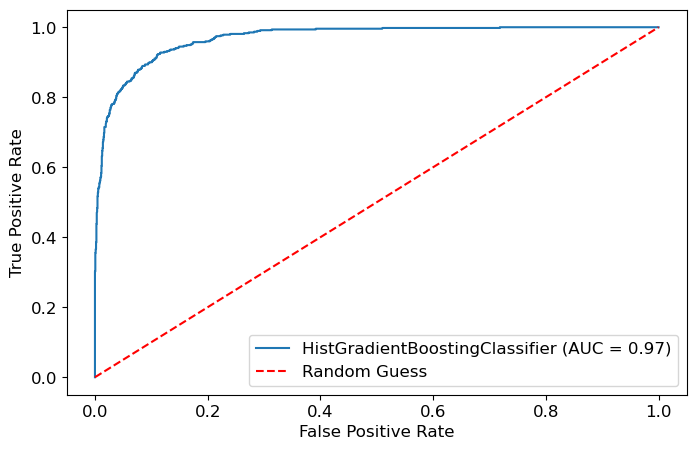

In [35]:
# Function to convert sparse matrix to dense
def to_dense(X):
    return X.toarray() if hasattr(X, 'toarray') else X

# Define the preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', FunctionTransformer(to_dense, accept_sparse=True))
        ]), categorical_features)
    ])

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train1, y_train1)

# Make predictions
y_pred_1 = pipeline.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred_1)
print(f'HistGradientBoostingClassifier Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test1, y_pred_1))


y_pred_prob = pipeline.predict_proba(X_test1)[:, 1]

fpr, tpr, _ = roc_curve(y_test1, y_pred_prob)
roc_auc = roc_auc_score(y_test1, y_pred_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'HistGradientBoostingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Classifiers with SA2

In [36]:
# Prepare data for modelling
data = cas_SA2

# Adding the crash category, splitting the data by the STD, 3.4 (0 <= to 3.4, 1 is above 3.4)
data['crashCategory'] = np.where(data['crashesCount'] <= 3.4, 0, 1)

# Adding the population to traffic volume ratio
data['ratio'] = data['population']/data['trafficCount']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   halfYear       19309 non-null  object 
 1   isHoliday      19309 non-null  int64  
 2   partOfDay      19309 non-null  object 
 3   weatherA       19309 non-null  object 
 4   weatherB       19309 non-null  object 
 5   SA2_Name       19309 non-null  object 
 6   SA3_Name       19309 non-null  object 
 7   trafficCount   19309 non-null  float64
 8   population     19309 non-null  float64
 9   crashesCount   19309 non-null  int64  
 10  crashCategory  19309 non-null  int64  
 11  ratio          19309 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


In [37]:
# Note that taking crashes up to the STD 3.4 creates 21% of the data in class 1.
data['crashCategory'].value_counts()

crashCategory
0    15104
1     4205
Name: count, dtype: int64

In [38]:
# TRAIN, VALIDATION AND TEST SETS

# - X_train: Training features
# - X_test: Testing features
# - y_train: Training target
# - y_test: Training Target

# Drop columns not to be used as features
X = data.drop(["halfYear","SA3_Name","crashesCount", "crashCategory","ratio"], axis=1)
y = data["crashCategory"]

# Split the training data into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [39]:
X.head(1)

,isHoliday,partOfDay,weatherA,weatherB,SA2_Name,trafficCount,population
0,0,Day,Fine,Frost,Armoy,4.994207e+06,1533750.0


In [40]:
y.head(1)

0    0
Name: crashCategory, dtype: int64

In [41]:
num_attribs = ["isHoliday","trafficCount","population"]
cat_attribs = ["partOfDay","weatherA","weatherB","SA2_Name"]

In [42]:
# Fit and transform the train set
preprocessor_pipeline, X_train_processed = pp(X_train, num_attribs, cat_attribs, fit=True)

# Transform the test set using the fitted pipeline
_, X_test_processed = pp(X_test, num_attribs, cat_attribs, preprocessor_pipeline=preprocessor_pipeline)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)

Processed X_train shape: (15447, 605)
Processed X_test shape: (3862, 605)


Logistic Regression Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3043
           1       0.76      0.63      0.69       819

    accuracy                           0.88      3862
   macro avg       0.83      0.79      0.80      3862
weighted avg       0.87      0.88      0.87      3862

Logistic Regression model saved to SA2_Logistic_Regression_model.joblib
k-NN Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      3043
           1       0.63      0.55      0.59       819

    accuracy                           0.84      3862
   macro avg       0.76      0.73      0.74      3862
weighted avg       0.83      0.84      0.83      3862

k-NN model saved to SA2_k-NN_model.joblib
Random Forest Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.88 

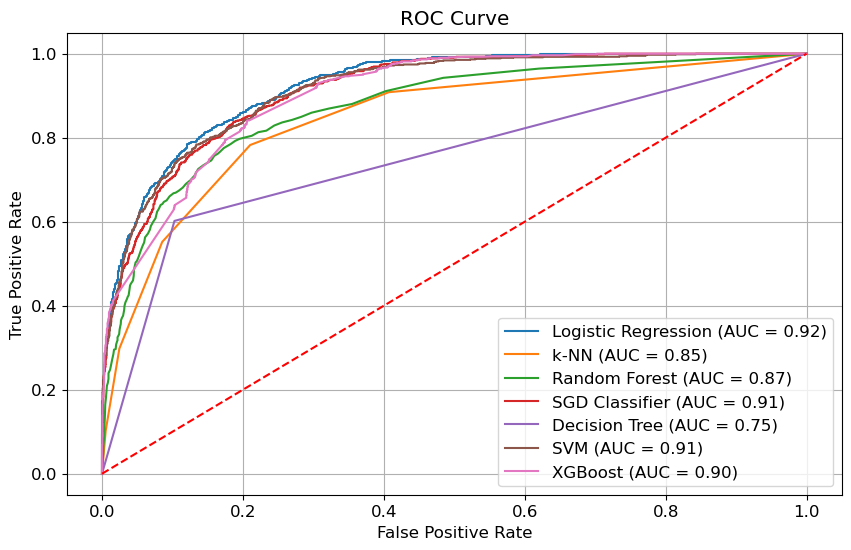

<Figure size 800x500 with 0 Axes>

In [43]:
# Allow 30 seconds to run
# List of classifiers to use
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SGD Classifier": SGDClassifier(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, clf in classifiers.items():
    clf.fit(X_train_processed, y_train)
    y_pred = clf.predict(X_test_processed)
    y_pred_prob = clf.predict_proba(X_test_processed)[:, 1] if hasattr(clf, "predict_proba") else clf.decision_function(X_test_processed)
    accuracy = accuracy_score(y_test, y_pred)
    plot_roc_auc(y_test, y_pred_prob, name)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    # Save each model with the prefix SA2_
    joblib_file = f"SA2_{name.replace(' ', '_')}_model.joblib"
    joblib.dump(clf, joblib_file)
    print(f"{name} model saved to {joblib_file}")


# Train and evaluate each classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.figure(figsize=(8, 5))
plt.show()

SA3 produces the best overall models with Logistic Regression producing the the highest accuracy

## Tuning SA2 Logistic Regression

In [44]:
# Takes approx 5 mins to run
# Will comment out code in final version because the result didn't produce a better model

# X_train_lr_tuned = X_train_processed
# y_train_lr_tuned = y_train
# y_test_lr_tuned = y_test
# y_pred_lr_tuned = y_pred


# param_dist = {
#     'C': uniform(loc=0, scale=4), # Inverse of regularization strength
#     'solver': ['liblinear', 'saga'], # Solvers that support L1 and L2 regularization
#     'penalty': ['l1', 'l2'] # Regularization penalty
# }

# lr = LogisticRegression(max_iter=1000)
# random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
# random_search.fit(X_train_processed, y_train)

# print("Best parameters found: ", random_search.best_params_)
# print("Best accuracy: ", random_search.best_score_)
# print(classification_report(y_test, y_pred))
# print("Model trained without displaying ConvergenceWarning.")


In [45]:
classifiers.items()

dict_items([('Logistic Regression', LogisticRegression(max_iter=1000)), ('k-NN', KNeighborsClassifier()), ('Random Forest', RandomForestClassifier()), ('SGD Classifier', SGDClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('SVM', SVC(probability=True)), ('XGBoost', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_para

## SA2 Naive Bayes

Naive Bayes Accuracy: 0.47
Naive Bayes ROC AUC: 0.64


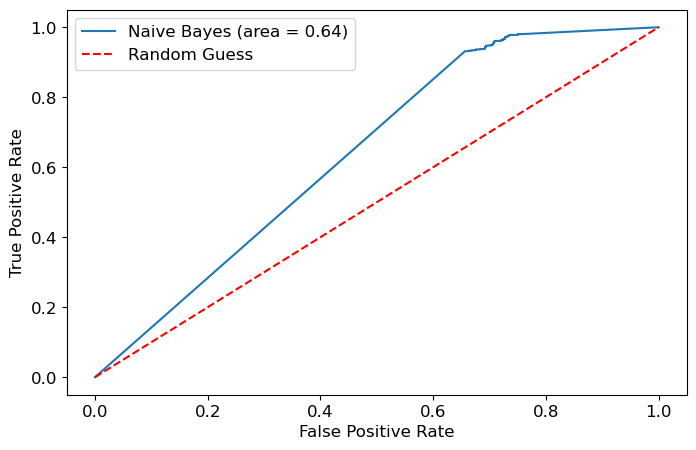

In [46]:
# Convert sparse matrices to dense matrices
X_train_dense = X_train_processed.toarray()
X_test_dense = X_test_processed.toarray()

# Initialize the Naive Bayes classifier
NB = GaussianNB()

# Train the classifier
NB.fit(X_train_dense, y_train)

# Make predictions
y_pred = NB.predict(X_test_dense)
y_pred_prob = NB.predict_proba(X_test_dense)[:, 1]

# Calculate accuracy and ROC AUC
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Naive Bayes Accuracy: {accuracy:.2f}')
print(f'Naive Bayes ROC AUC: {roc_auc:.2f}')

# Plotting the ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='Naive Bayes (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## SA2 HistGradientBoostingClassifier

In [47]:
encoder = OrdinalEncoder()
X[cat_attribs] = encoder.fit_transform(X[cat_attribs])
X_out = X[cat_attribs + num_attribs]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_out, y, test_size=0.2, random_state=15)

categorical_features = [X_out.columns.get_loc(col) for col in cat_attribs]
numerical_features = [col for col in X_train1.columns if col not in categorical_features]

HistGradientBoostingClassifier Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      3043
           1       0.77      0.54      0.64       819

    accuracy                           0.87      3862
   macro avg       0.83      0.75      0.78      3862
weighted avg       0.86      0.87      0.86      3862



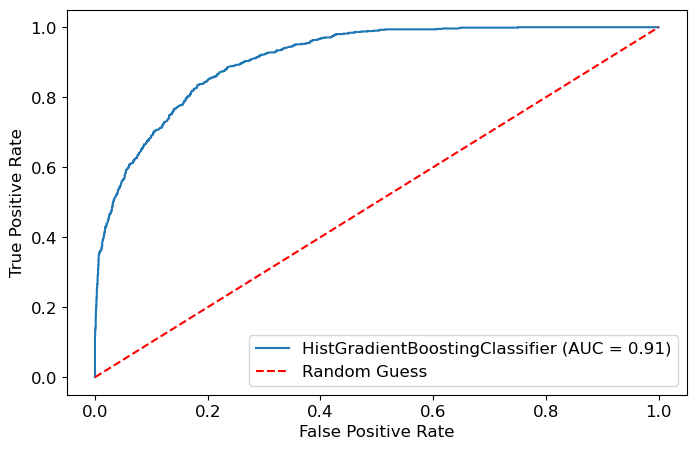

In [48]:

# Function to convert sparse matrix to dense
def to_dense(X):
    return X.toarray() if hasattr(X, 'toarray') else X

# Define the preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore')),
            ('to_dense', FunctionTransformer(to_dense, accept_sparse=True))
        ]), categorical_features)
    ])

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', HistGradientBoostingClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train1, y_train1)

# Make predictions
y_pred_1 = pipeline.predict(X_test1)

# Evaluate the model
accuracy = accuracy_score(y_test1, y_pred_1)
print(f'HistGradientBoostingClassifier Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test1, y_pred_1))


y_pred_prob = pipeline.predict_proba(X_test1)[:, 1]

fpr, tpr, _ = roc_curve(y_test1, y_pred_prob)
roc_auc = roc_auc_score(y_test1, y_pred_prob)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'HistGradientBoostingClassifier (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Regression SA2

This uses the crashes count for SA3 and the crashes count. Given that most of the crash numbers for each area are quite small, there isn't much for in each row to train on and have used hte larger geographic areas SA3 to have more crashes per row.

Results are poor given that most of crash numbers are low but there is an outlier area with 67 crashes.

In [49]:
# TRAIN, VALIDATION AND TEST SETS

# - X_train: Training features
# - X_test: Testing features
# - y_train: Training target
# - y_test: Training Target

data = cas_SA2

# Drop columns not to be used as features
X = data.drop(["halfYear","SA3_Name","crashesCount", "crashCategory","ratio"], axis=1)
y = data["crashesCount"]

# Split the training data into train and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [50]:
X.head(1)

,isHoliday,partOfDay,weatherA,weatherB,SA2_Name,trafficCount,population
0,0,Day,Fine,Frost,Armoy,4.994207e+06,1533750.0


In [51]:
num_attribs = ["isHoliday","trafficCount","population"]
cat_attribs = ["partOfDay","weatherA","weatherB","SA2_Name"]

In [52]:
# Fit and transform the train set
preprocessor_pipeline, X_train_processed = pp(X_train, num_attribs, cat_attribs, fit=True)

# Transform the test set using the fitted pipeline
_, X_test_processed = pp(X_test, num_attribs, cat_attribs, preprocessor_pipeline=preprocessor_pipeline)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)

Processed X_train shape: (15447, 605)
Processed X_test shape: (3862, 605)


In [53]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR  # Changed from SVC to SVR for regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# List of Regressors to use
regressors = {
    "k-NN": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Support Vector Machine": SVR(),
    "SGD Regressor": SGDRegressor()
}

# Train and evaluate each regressor
for name, reg in regressors.items():
    reg.fit(X_train_processed, y_train)
    y_pred = reg.predict(X_test_processed)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'{name} Performance:')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R^2 Score: {r2:.2f}')
    print('---------------------------')

k-NN Performance:
Mean Absolute Error: 1.31
Mean Squared Error: 4.94
R^2 Score: 0.52
---------------------------
Random Forest Performance:
Mean Absolute Error: 1.02
Mean Squared Error: 3.29
R^2 Score: 0.68
---------------------------
Support Vector Machine Performance:
Mean Absolute Error: 1.30
Mean Squared Error: 6.94
R^2 Score: 0.32
---------------------------
SGD Regressor Performance:
Mean Absolute Error: 1.68
Mean Squared Error: 6.56
R^2 Score: 0.36
---------------------------


## Use a logistic regression model to predict crashes hot spots

In [54]:
# Load the SA2 regression model 
SA2_logistic_regression_model = joblib.load("SA2_Logistic_Regression_model.joblib")

# Load the inference dataset
inference_dataset = pd.read_csv('basic_inference_data.csv')

# Prepare the inference dataset for prediction
inference_dataset =  inference_dataset.drop(columns=['SA22023_V1_00_Filled','SA22023_V1_00_NAME','SA32023_V1_00','SA32023_V1_00_NAME','SA32023_V1_00_NAME_ASCII'])
inference_dataset.rename(columns={'SA22023_V1_00_NAME_ASCII': 'SA2_Name', 'Traffic Count' : 'trafficCount', 'Population' : 'population'}, inplace=True)

In [55]:
inference_dataset.head()

,date,isHoliday,SA2_Name,weatherA,weatherB,partOfDay,trafficCount,population
0,2024-05-28,0,Waiake,Heavy rain,Strong wind,day,3.941651e+06,1678000.0
1,2024-05-28,0,Waiake,Heavy rain,Strong wind,night,3.941651e+06,1678000.0
2,2024-05-28,0,Papakura Central,Heavy rain,Strong wind,night,3.941651e+06,1678000.0
3,2024-05-28,0,Papakura Central,Heavy rain,Strong wind,day,3.941651e+06,1678000.0
4,2024-05-28,0,Otara South West,Heavy rain,Strong wind,night,3.941651e+06,1678000.0


In [56]:
# Prepare the data set for prediction
X_predict = inference_dataset.drop(columns=['date'])
num_attribs = ["isHoliday","trafficCount","population"]
cat_attribs = ["partOfDay","weatherA","weatherB","SA2_Name"]
_, X_predict_processed = pp(X_predict, num_attribs, cat_attribs, preprocessor_pipeline=preprocessor_pipeline)

# Predict using the logistic regression model
y_pred_logistic = SA2_logistic_regression_model.predict(X_predict_processed)

# Add the predictions back to the inferenc data set
inference_dataset['predicted_value'] = y_pred_logistic

# Save the results to a CSV file to be used in the application
inference_dataset.to_csv('prediction_data.csv', index=False)

In [57]:
inference_dataset.head()

,date,isHoliday,SA2_Name,weatherA,weatherB,partOfDay,trafficCount,population,predicted_value
0,2024-05-28,0,Waiake,Heavy rain,Strong wind,day,3.941651e+06,1678000.0,0
1,2024-05-28,0,Waiake,Heavy rain,Strong wind,night,3.941651e+06,1678000.0,0
2,2024-05-28,0,Papakura Central,Heavy rain,Strong wind,night,3.941651e+06,1678000.0,0
3,2024-05-28,0,Papakura Central,Heavy rain,Strong wind,day,3.941651e+06,1678000.0,0
4,2024-05-28,0,Otara South West,Heavy rain,Strong wind,night,3.941651e+06,1678000.0,0


In [58]:
inference_dataset['predicted_value'].value_counts()

predicted_value
0    14202
1     2402
Name: count, dtype: int64

In [59]:
inference_dataset.groupby(['date'])['predicted_value'].sum()

date
2024-05-28      0
2024-05-29     20
2024-05-30    310
2024-05-31    310
2024-06-01    288
2024-06-02    296
2024-06-03      0
2024-06-04     80
2024-06-05     44
2024-06-06      2
2024-06-07    128
2024-06-08    310
2024-06-09    304
2024-06-10    310
Name: predicted_value, dtype: int64